# Hyperparameter-Optimierung am Beispiel RandomForestClassifier

Ziel der Hyperparameter-Optimierung ist es, die **Leistung** eines Modells zu verbessern, ohne dass es zu einer sog. Überanpassung (Overfitting) kommt. Dabei werden die besten Einstellungen für bestimmte Parameter (Hyperparameter) des ML-Algorithmus durch systematisches Testen ermittelt.


## Wichtigste Hyperparameter des RFC

| Hyperparameter        | Beschreibung                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| `n_estimators`        | Anzahl der Entscheidungsbäume im Wald. Mehr Bäume → stabiler, aber langsamer beim Training/Betrieb. |
| `max_depth`           | Maximale Tiefe eines Baumes. Geringe Tiefe → weniger Overfitting.            |
| `max_features`        | Anzahl der Merkmale, die beim Split geprüft werden. `sqrt` ist Standard (gut). |
| `min_samples_split`   | Minimale Anzahl Samples, um einen neuen Split zu machen. Höher = weniger Overfitting. |
| `min_samples_leaf`    | Minimale Samples pro Blatt. Höher = glattere (robustere) Bäume.              |
| `bootstrap`           | Bestimmt, ob jeder Baum mit zufällig ausgewählten Trainingsdaten trainiert wird.          |


## Overfitting 
**Overfitting** bedeutet, dass ein Machine-Learning-Modell die Trainingsdaten zu genau lernt – inklusive aller Zufälligkeiten und extrem abweichender Werte (sog. Ausreißer). Das Modell merkt sich gewissermaßen die Daten auswendig, statt die zugrunde liegenden Muster zu verstehen. Dadurch erzielt es zwar auf den Trainingsdaten sehr gute Ergebnisse, versagt aber oft bei neuen, unbekannten Daten, weil es dort keine echten Zusammenhänge mehr erkennt. Overfitting ist ein häufiges Problem, vor allem bei komplexen Modellen oder kleinen Datensätzen, und kann durch geeignete Maßnahmen wie Cross-Validation, regulierende Hyperparameter (siehe Tabelle oben) oder bewusstes Modell-Tuning reduziert werden.


## Cross Validation (Kreuzvalidierung)

**Cross-Validation (Kreuzvalidierung)** ist eine Methode, um die Leistung eines Modells zuverlässiger zu bewerten – besonders bei der **Hyperparameter-Optimierung**.

Anstatt das Modell nur einmal auf einem Trainings-/Test-Split zu testen, wird es mehrfach auf verschiedenen Datenaufteilungen geprüft. So erkennt man besser, ob ein Modell wirklich gut generalisiert oder nur zufällig auf einer Teilmenge gut war.


- Bei **k-fold Cross Validation** wird der Datensatz in `k` Teile geteilt.
- Das Modell wird `k`-mal trainiert: Jedes Mal mit einem anderen Teil als Testdaten.

<img src="https://www.ejable.com/wp-content/uploads/2022/04/steps-for-K-fold-Cross-Validation.webp" alt="Grafische Darstellung einer Cross Validation" width="50%">


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import datasets

In [7]:
iris = datasets.load_iris()

In [9]:
X = iris['data']
y = iris['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [13]:
clf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=11)

In [15]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=11)

In [17]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
# oder noch einfacher
accuracy_score(y_test, y_pred)

0.9555555555555556

Feature Importance:
             Feature  Importance
3   petal width (cm)    0.514797
2  petal length (cm)    0.336444
0  sepal length (cm)    0.127951
1   sepal width (cm)    0.020808


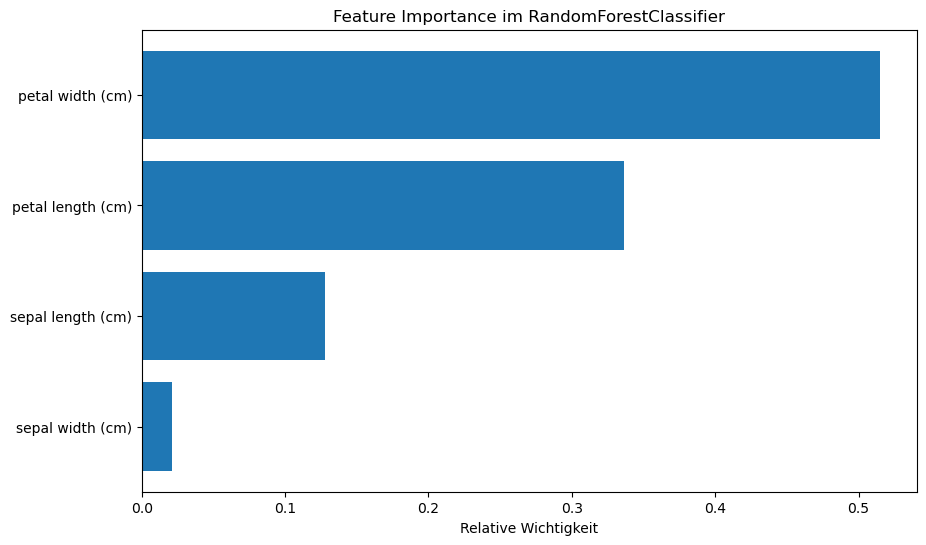

In [25]:
# Welche Features sind am bedeutendsten:
# Feature Importance Analyse
import pandas as pd
import matplotlib.pyplot as plt

# Feature-Namen aus dem Iris-Datensatz
feature_names = iris['feature_names']

# Feature Importance aus dem trainierten RandomForest-Modell
importances = clf.feature_importances_

# DataFrame für bessere Darstellung erstellen
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Ausgabe der Feature-Wichtigkeiten
print("Feature Importance:")
print(feature_importance_df)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Relative Wichtigkeit')
plt.title('Feature Importance im RandomForestClassifier')
plt.gca().invert_yaxis()  # Wichtigstes Feature oben
plt.show()

In [27]:
import matplotlib.pyplot as plt 

Die Feature Importance kann man auch grafisch darlegen:

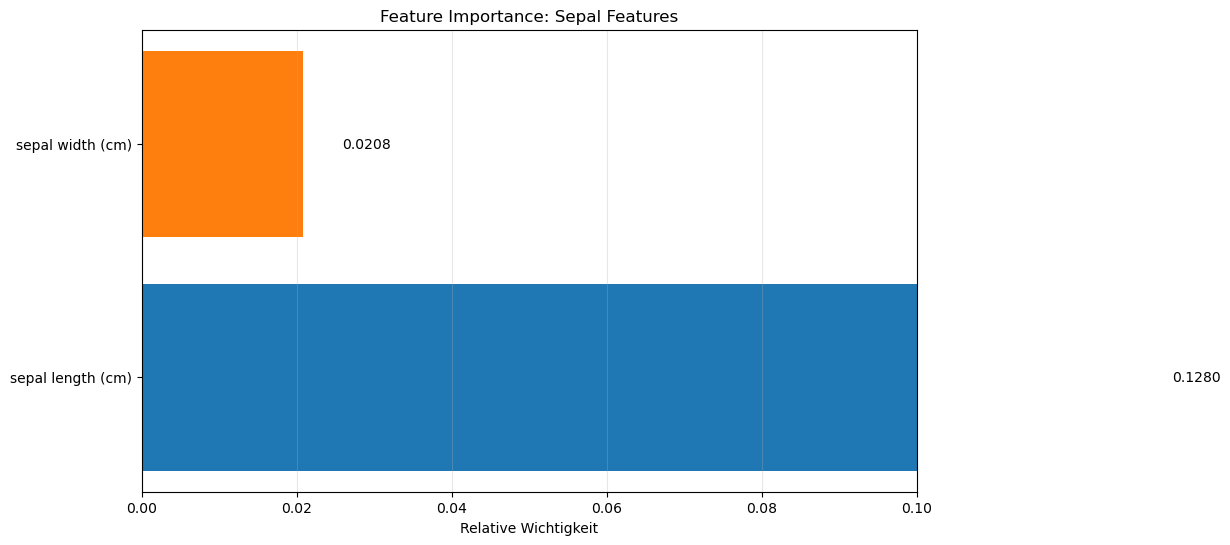

In [31]:
# Visualisierung der sepal-Features
plt.figure(figsize=(10, 6))

# Nur sepal features filtern
sepal_features = ['sepal length (cm)', 'sepal width (cm)']
sepal_importances = [importances[feature_names.index(f)] for f in sepal_features]  # Korrektur hier

# Farben für die Visualisierung
colors = ['#1f77b4', '#ff7f0e']

# Horizontaler Barplot
plt.barh(sepal_features, sepal_importances, color=colors)
plt.xlabel('Relative Wichtigkeit')
plt.title('Feature Importance: Sepal Features')
plt.xlim(0, 0.1)  # Angepasster Bereich für bessere Darstellung
plt.grid(axis='x', alpha=0.3)

# Werte an den Bars anzeigen
for index, value in enumerate(sepal_importances):
    plt.text(value + 0.005, index, f'{value:.4f}', va='center')

plt.show()

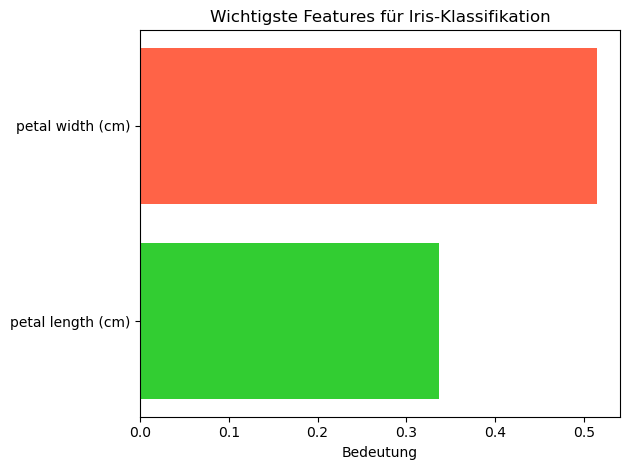

In [39]:
plt.barh(petal_features, petal_importance, color=['limegreen', 'tomato'])
plt.title('Wichtigste Features für Iris-Klassifikation')
plt.xlabel('Bedeutung')
plt.tight_layout()
plt.show()

## Hyperparameter Optimierung

`GridSearchCV` is your friend (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). By the way: CV steht für *Cross Validation*.

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


### Umsetzungsbeispiel für RFC
Details bzgl. Hyperparamter sind der RFC-Dokumentation zu entnehmen: https://sklearn.org/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [49]:
param_grid = {
    'n_estimators': [25, 50, 75],
    'max_features': [2, 3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2]
}

# 2. GridSearchCV initialisieren
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fache Kreuzvalidierung
    n_jobs=-1,  # Nutzt alle CPU-Kerne
    verbose=1
)

# 3. Suche durchführen
grid_search.fit(X_train, y_train)

# 4. Ergebnisse ausgeben
print("Beste Parameter:", grid_search.best_params_)
print("Beste Genauigkeit:", grid_search.best_score_)

# 5. Bestes Modell verwenden
best_rfc = grid_search.best_estimator_
test_score = best_rfc.score(X_test, y_test)
print("Testgenauigkeit:", test_score)

results_df = pd.DataFrame(grid_search.cv_results_)
print("\nTop 5 Parameter-Kombinationen:")
print(results_df[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head())

# 2. Beste Parameter und Score
print("\nBeste Kombination:")
print(f"Parameter: {grid_search.best_params_}")
print(f"Beste Genauigkeit (CV): {grid_search.best_score_:.3f}")

# 3. Evaluation auf Testdaten
test_score = grid_search.best_estimator_.score(X_test, y_test)
print(f"Testgenauigkeit: {test_score:.3f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Beste Parameter: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Beste Genauigkeit: 0.9523809523809523
Testgenauigkeit: 0.9555555555555556

Top 5 Parameter-Kombinationen:
                                                params  mean_test_score
107  {'max_depth': 7, 'max_features': 3, 'min_sampl...         0.952381
28   {'max_depth': 3, 'max_features': 3, 'min_sampl...         0.952381
30   {'max_depth': 3, 'max_features': 3, 'min_sampl...         0.952381
31   {'max_depth': 3, 'max_features': 3, 'min_sampl...         0.952381
32   {'max_depth': 3, 'max_features': 3, 'min_sampl...         0.952381

Beste Kombination:
Parameter: {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Beste Genauigkeit (CV): 0.952
Testgenauigkeit: 0.956


Details bzgl. der `GridSearchCV`-Parameter sind dieser Quelle zu entnehmen: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html